# Import des outils / jeu de données

In [19]:
import pandas as pd

from src.modelisation.univariate.parametric.models import create_models
from src.modelisation.univariate.parametric.plot import (
    plot_hazard_estimation,
    plot_hazard_estimations,
    plot_survival_estimation,
    plot_survival_estimations,
)
from src.utils import init_notebook

In [20]:
init_notebook()

# Données

In [21]:
df = pd.read_csv(
    "data/kickstarter_1.csv",
    parse_dates=True,
)

In [22]:
event_times = df["day_succ"]
event_observed = df["Status"]

event_times_no_censoring = df["day_succ"][df["Status"] == 1]
event_observed_no_censoring = df["Status"][df["Status"] == 1]
df_video = df[df["has_video"] == 1].copy()
df_no_video = df[df["has_video"] == 0].copy()

t_video = df_video["day_succ"]
o_video = df_video["Status"]

t_no_video = df_no_video["day_succ"]
o_no_video = df_no_video["Status"]

In [23]:
models = create_models()

# Fonction de survie

## Modèles paramétriques

In [24]:
from scipy.stats import weibull_min, kstest, expon, lognorm
import numpy as np

# Génération de données selon la loi de Weibull
np.random.seed(42)
data = df["day_succ"]

# Test de Kolmogorov-Smirnov
ks_statistic, p_value = kstest(data, "weibull_min", args=(1.5,))

# Test de Kolmogorov-Smirnov
ks_statistic_exp, p_value_exp = kstest(data, "expon", args=(0, 1))

ks_statistic_lognorm, p_value_lognorm = kstest(
    data, "lognorm", args=(0.954, 0, np.exp(0))
)


print(f"KS test for Weibull\nStatistic: {ks_statistic}, P-value: {p_value}")
print("")
print(f"KS test for exponential\n{ks_statistic_exp}, P-value: {p_value_exp}")
print("")
print(f"KS test for lognormal\n{ks_statistic_lognorm}, P-value: {p_value_lognorm}")

KS test for Weibull
Statistic: 0.9288334267706474, P-value: 0.0

KS test for exponential
0.9032021727613936, P-value: 0.0

KS test for lognormal
0.8710483180388587, P-value: 0.0


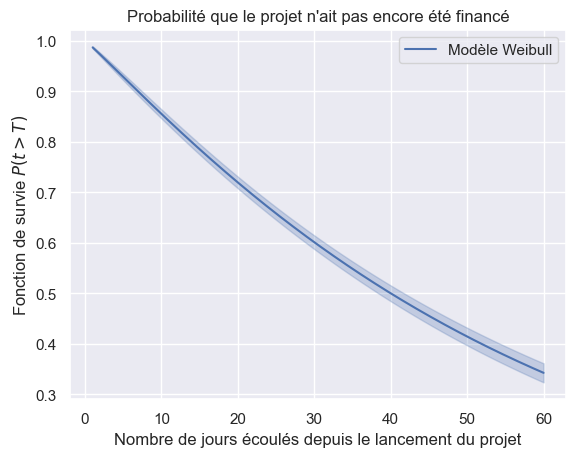

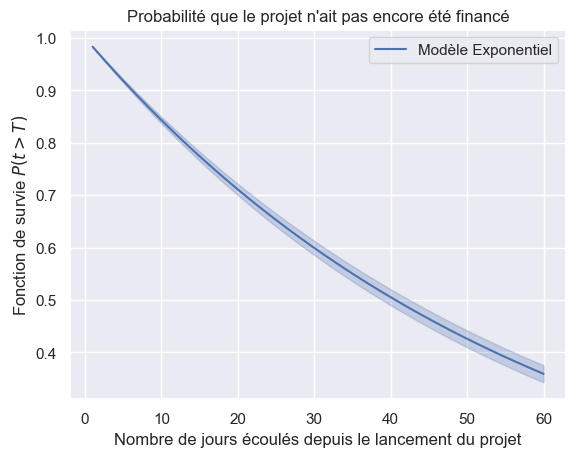

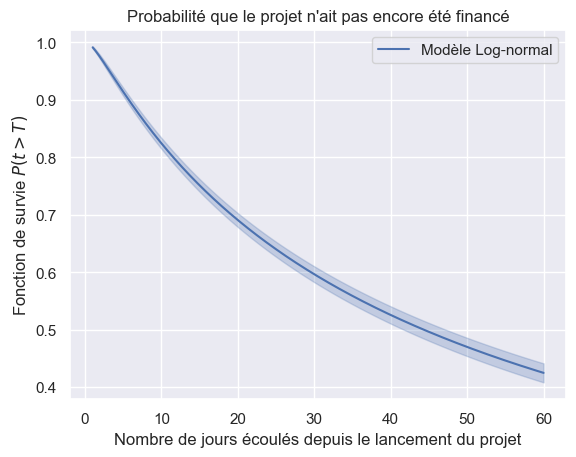

In [25]:
plot_survival_estimations(models, event_times, event_observed)

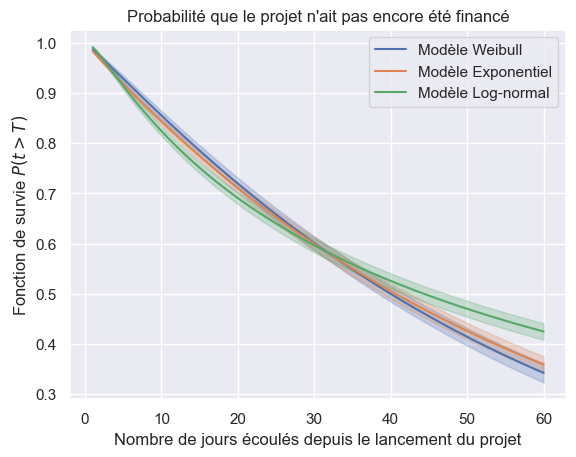

In [26]:
# todo tracer kaplam meier et test de logrank
plot_survival_estimations(models, event_times, event_observed, same_plot=True)

## Impact de la censure

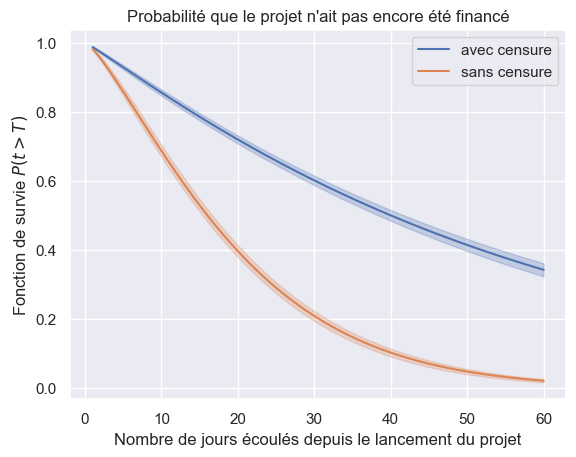

In [27]:
plot_survival_estimation(models["Weibull"], event_times, event_observed, "avec censure")
plot_survival_estimation(
    models["Weibull"],
    event_times_no_censoring,
    event_observed_no_censoring,
    "sans censure",
)

## Co-variables

### Vidéo de présentation

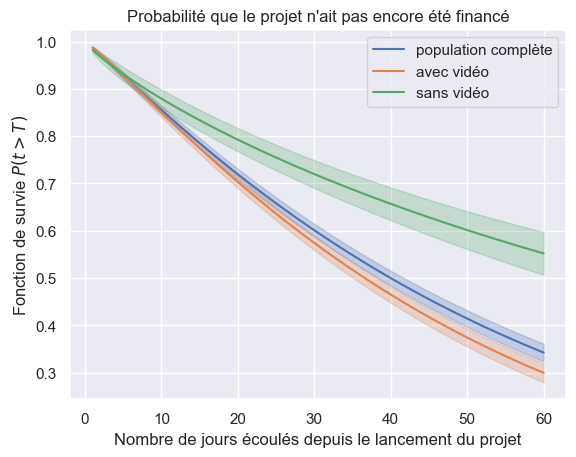

In [28]:
plot_survival_estimation(
    models["Weibull"], event_times, event_observed, "population complète"
)
plot_survival_estimation(models["Weibull"], t_video, o_video, "avec vidéo")
plot_survival_estimation(models["Weibull"], t_no_video, o_no_video, "sans vidéo")

# Fonction de risque

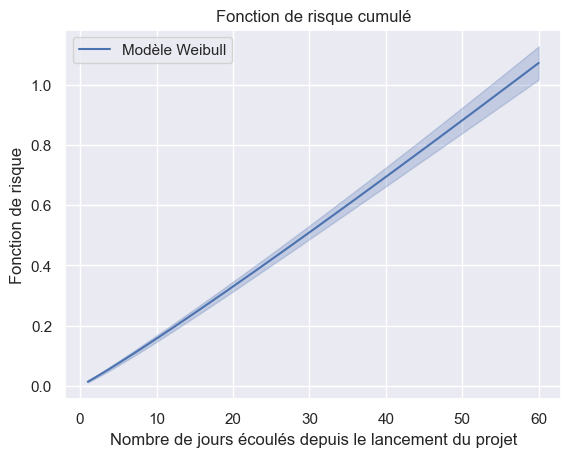

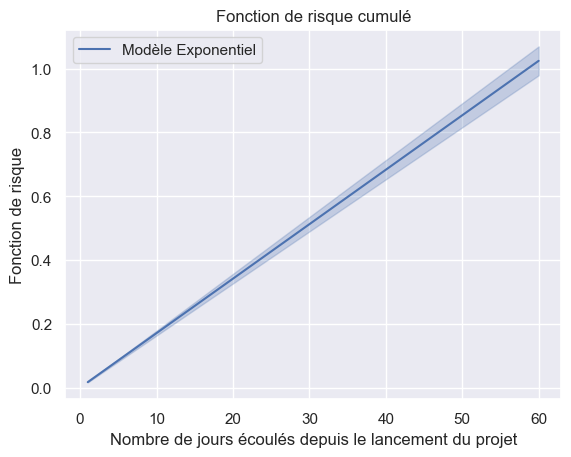

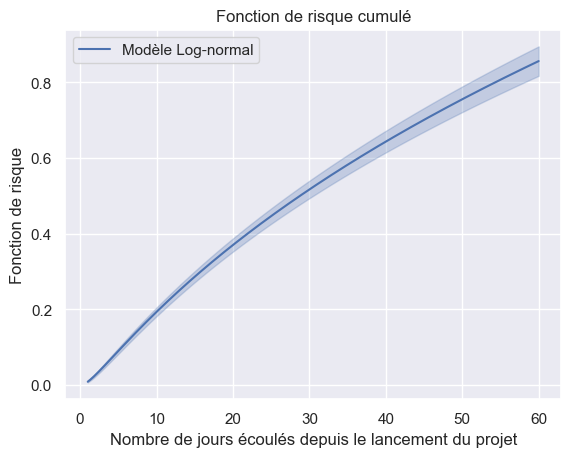

In [29]:
plot_hazard_estimations(models, event_times, event_observed)

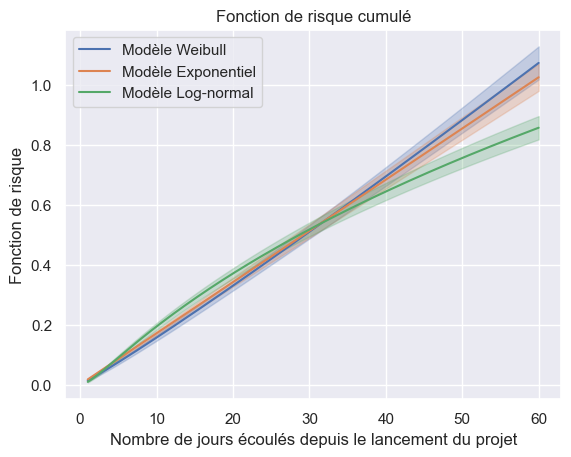

In [30]:
plot_hazard_estimations(models, event_times, event_observed, same_plot=True)

## Impact de la censure

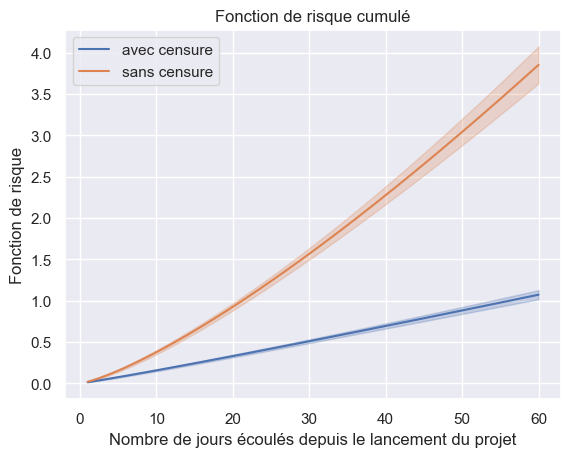

In [31]:
plot_hazard_estimation(models["Weibull"], event_times, event_observed, "avec censure")
plot_hazard_estimation(
    models["Weibull"],
    event_times_no_censoring,
    event_observed_no_censoring,
    "sans censure",
)

## Co-variables

### Vidéo de présentation

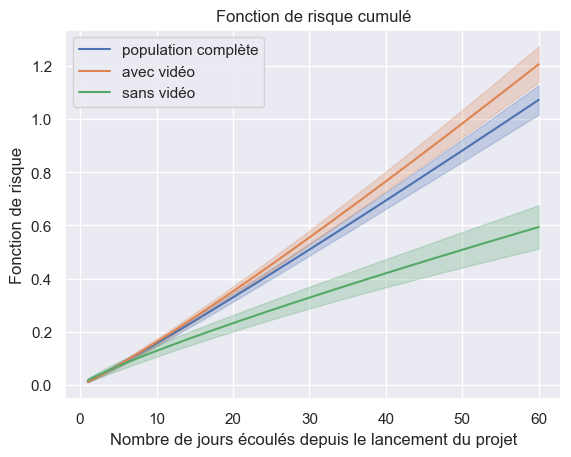

In [32]:
plot_hazard_estimation(
    models["Weibull"], event_times, event_observed, "population complète"
)
plot_hazard_estimation(models["Weibull"], t_video, o_video, "avec vidéo")
plot_hazard_estimation(models["Weibull"], t_no_video, o_no_video, "sans vidéo")